<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [3]:
##Write your code here
industry_counts = df['Industry'].value_counts(dropna=False)
print(industry_counts.head(10))

Industry
NaN                                           36579
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Name: count, dtype: int64


/tmp/ipykernel_1256/3803138956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index[:10], palette='Set2')


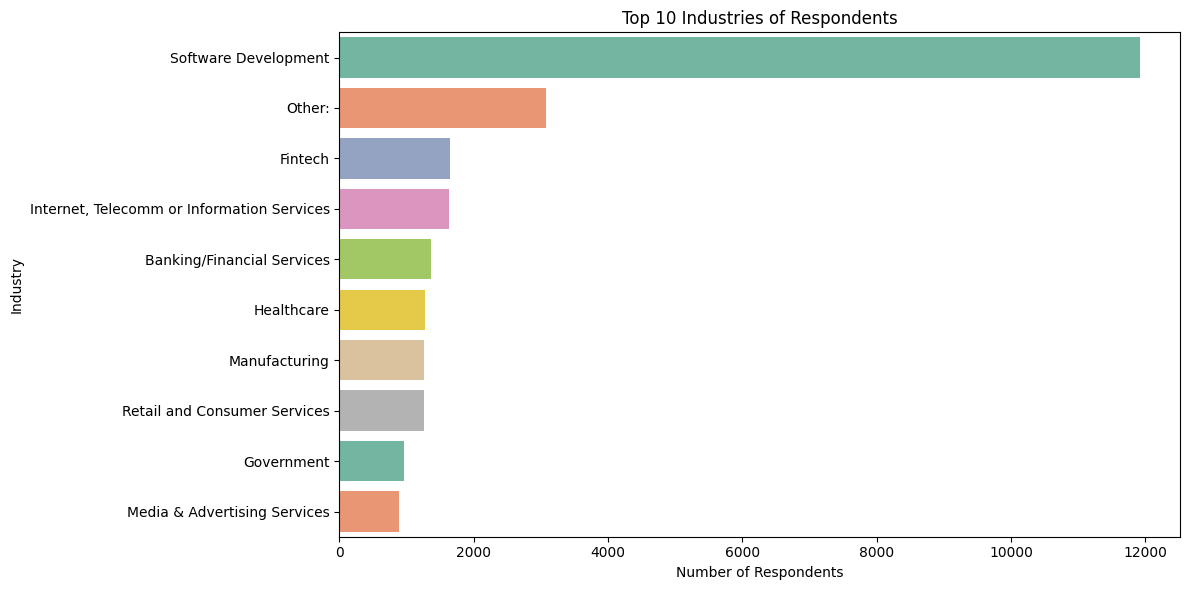

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index[:10], palette='Set2')

plt.title('Top 10 Industries of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Loại bỏ missing để tính toán
comp_clean = df['ConvertedCompYearly'].dropna()


mean_value = comp_clean.mean()
median_value = comp_clean.median()
std_value = comp_clean.std()

print("mean value is {}, median value is {}, std value is {}" . format(mean_value, median_value, std_value))

mean value is 86155.28726264134, median value is 65000.0, std value is 186756.97308629754


In [7]:
threshold = mean_value + 3 * std_value

# Lọc outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"Số lượng outliers: {len(outliers)}")
print(outliers[['Country', 'Employment', 'ConvertedCompYearly']].head())

Số lượng outliers: 89
                       Country           Employment  ConvertedCompYearly
529   United States of America  Employed, full-time             650000.0
828   United States of America  Employed, full-time            1000000.0
1932  United States of America  Employed, full-time             945000.0
2171  United States of America  Employed, full-time             750000.0
2187                     Gabon  Employed, full-time            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [8]:
##Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp_clean = df['ConvertedCompYearly'].dropna()

In [9]:
# Tính các phần tư
Q1 = comp_clean.quantile(0.25)
Q3 = comp_clean.quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): ${Q1:,.0f}")
print(f"Q3 (75th percentile): ${Q3:,.0f}")
print(f"IQR: ${IQR:,.0f}")
print(f"Lower bound: ${lower_bound:,.0f}")
print(f"Upper bound: ${upper_bound:,.0f}")

Q1 (25th percentile): $32,712
Q3 (75th percentile): $107,972
IQR: $75,260
Lower bound: $-80,177
Upper bound: $220,861


In [10]:
iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print(f"Số lượng outliers theo IQR: {len(iqr_outliers)}")

Số lượng outliers theo IQR: 978


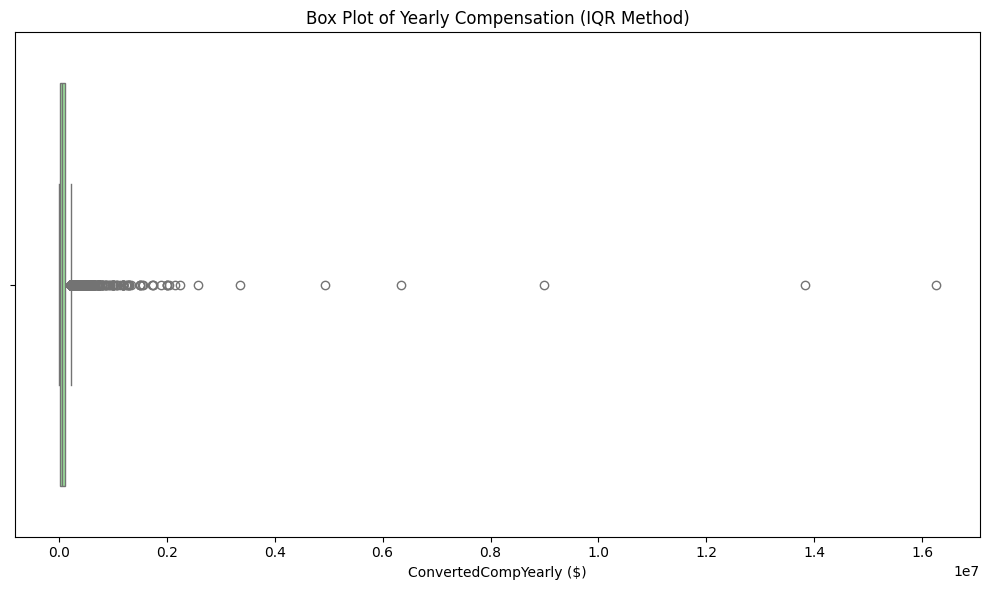

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=comp_clean, color='lightgreen')
plt.title('Box Plot of Yearly Compensation (IQR Method)')
plt.xlabel('ConvertedCompYearly ($)')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [14]:
##Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp_clean = df['ConvertedCompYearly'].dropna()

# Tính IQR
Q1 = comp_clean.quantile(0.25)
Q3 = comp_clean.quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Số dòng ban đầu: {len(df)}")
print(f"Số dòng sau khi loại bỏ outliers: {len(df_no_outliers)}")
print(f"Đã loại bỏ: {len(df) - len(df_no_outliers)} dòng (outliers)")

Số dòng ban đầu: 65437
Số dòng sau khi loại bỏ outliers: 22457
Đã loại bỏ: 42980 dòng (outliers)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [15]:
##Write your code here
#Map the Age column to approximate numeric values.
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None,
    'NA': None
}

# Tạo cột mới: Age_Num
df['Age_Num'] = df['Age'].map(age_map)

In [21]:
def convert_years_code_pro(value):
    if pd.isna(value):
        return None
    value = str(value).strip().lower()
    if 'less than' in value:
        return 0.5
    elif 'more than' in value:
        return 51.0
    else:
        try:
            return float(value)
        except ValueError:
            return None

# Áp dụng hàm
df['YearsCodePro_Clean'] = df['YearsCodePro'].apply(convert_years_code_pro)

In [23]:
numeric_cols = ['Age_Num', 'JobSat', 'ConvertedCompYearly','YearsCodePro_Clean', 'WorkExp']

# Loại bỏ dòng thiếu
df_corr = df[numeric_cols].dropna()

# Tính ma trận tương quan
corr_matrix = df_corr.corr(method='pearson')

# In riêng dòng liên quan đến tuổi
print("Pearson correlation with Age:")
print(corr_matrix['Age_Num'].sort_values(ascending=False))

Pearson correlation with Age:
Age_Num                1.000000
WorkExp                0.847021
YearsCodePro_Clean     0.818459
ConvertedCompYearly    0.134698
JobSat                 0.070198
Name: Age_Num, dtype: float64


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
